Sources: 
https://www.statistics.gov.rw/datasource/42
https://microdata.statistics.gov.rw/index.php/catalog/65
https://www.statistics.gov.rw/publication/rphc4-final-report-publication-tables
https://www.worldpop.org/geodata/summary?id=14905
https://data.humdata.org/dataset/rwanda-administrative-boundaries-level-1-4

                    Starting age        Duration
ECE                            1              6
Pre-primary                    4              3
Primary                        7              6
Lower secondary               13              3
Upper secondary               16              3

In [1]:
import sys, os, csv, math, statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
os.chdir("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data")  # REMOVE
if os.getcwd()!="C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Please insert the WORKING DIRECTORY
Remember to separate the backslash (for Windows) or forward slash (in Mac)
C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data
Your new path is C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298_RND_SDA\WorkFiles_Experts\298-Issue-Papers\298-Issue-Paper-Sprague\Replication files\Data


In [3]:
Rwanda_SingleSample = pd.read_stata("Tables\\Rwanda\\rphc-2012-data-v2.dta", columns=['L01', 'L02', 'L03', 'P03', 'P05'])
Rwanda = Rwanda_SingleSample
for x in range(0,9):
    Rwanda = pd.concat([Rwanda, Rwanda_SingleSample])
Rwanda = Rwanda.rename(columns={'L01':'ADM1_EN', 'L02':'ADM2_EN_Code', 'L03':'ADM3_EN_Code', 'P03':'Sex', 'P05':'Age'})
Rwanda = Rwanda[Rwanda['Age']<=29]
Rwanda['ADM2_EN_Code'] = Rwanda['ADM2_EN_Code'].astype('category')
Rwanda['ADM3_EN_Code'] = Rwanda['ADM3_EN_Code'].astype('category')
Rwanda['Age'] = Rwanda['Age'].astype(int)
Rwanda['Sex'] = Rwanda['Sex'].astype('category')
Rwanda['Count']=1
Rwanda.reset_index(drop=True)


,ADM1_EN,ADM2_EN_Code,ADM3_EN_Code,Sex,Age,Count
0,Kigali City,1.0,1.0,Male,23,1
1,Kigali City,1.0,1.0,Male,9,1
2,Kigali City,1.0,1.0,Female,19,1
3,Kigali City,1.0,1.0,Male,18,1
4,Kigali City,1.0,1.0,Female,16,1
...,...,...,...,...,...,...
7326305,Eastern Province,7.0,14.0,Male,12,1
7326306,Eastern Province,7.0,14.0,Male,10,1
7326307,Eastern Province,7.0,14.0,Female,5,1
7326308,Eastern Province,7.0,14.0,Male,22,1


In [4]:
Rwanda = Rwanda.groupby(['ADM1_EN', 'ADM2_EN_Code', 'ADM3_EN_Code', 'Sex', 'Age'], as_index=False, observed=True).agg({'Count':sum})

In [5]:
Rwanda = Rwanda.pivot_table(index=['ADM1_EN', 'ADM2_EN_Code', 'ADM3_EN_Code'], columns=['Sex', 'Age'], values='Count')
Rwanda

Sex                                        Male                                \
Age                                          0    1    2    3    4    5    6    
ADM1_EN          ADM2_EN_Code ADM3_EN_Code                                      
Kigali City      1.0          1.0           370  360  270  330  350  340  330   
                              2.0           360  360  260  450  320  390  350   
                              3.0           420  560  600  570  490  450  420   
                              4.0           840  660  560  610  570  570  590   
                              5.0           440  550  400  500  560  470  510   
...                                         ...  ...  ...  ...  ...  ...  ...   
Eastern Province 7.0          11.0          240  280  320  390  580  430  330   
                              12.0          430  370  360  510  470  470  250   
                              13.0          390  420  230  370  340  490  290   
                              14.0          610  600  440  490  550  490  520   
                              15.0          230  300  190  200  240  230  240   

Sex                                                        ... Female       \
Age                                          7    8    9   ...     20   21   
ADM1_EN          ADM2_EN_Code ADM3_EN_Code                 ...               
Kigali City      1.0          1.0           230  350  290  ...    430  330   
                              2.0           230  200  190  ...    220  200   
                              3.0           390  260  530  ...    350  320   
                              4.0           500  320  410  ...    730  510   
                              5.0           290  320  230  ...    170  280   
...                                         ...  ...  ...  ...    ...  ...   
Eastern Province 7.0          11.0          310  290  360  ...    250  170   
                              12.0          400  260  390  ...    350  280   
                              13.0          260  280  230  ...    260  160   
                              14.0          370  500  370  ...    290  210   
                              15.0          190  240  240  ...     60   70   

Sex                                                                            \
Age                                          22   23   24   25   26   27   28   
ADM1_EN          ADM2_EN_Code ADM3_EN_Code                                      
Kigali City      1.0          1.0           420  420  280  470  270  350  380   
                              2.0           250  280  330  310  210  230  220   
                              3.0           410  350  410  360  430  320  260   
                              4.0           660  600  560  660  670  550  580   
                              5.0           160  180  270  200  200  200  210   
...                                         ...  ...  ...  ...  ...  ...  ...   
Eastern Province 7.0          11.0          160  120  130  140  110  210  250   
                              12.0          320  340  240  270  230  270  290   
                              13.0          250  180  350  210  170  190  270   
                              14.0          320  240  170  270  270  230  260   
                              15.0          110   40  160  150  150   60  160   

Sex                                              
Age                                          29  
ADM1_EN          ADM2_EN_Code ADM3_EN_Code       
Kigali City      1.0          1.0           290  
                              2.0           190  
                              3.0           250  
                              4.0           570  
                              5.0           240  
...                                         ...  
Eastern Province 7.0          11.0          180  
                              12.0          260  
                              13.0          170  
                              14.0   

In [6]:
Rwanda.to_csv('Tables\\Rwanda\\Population_Rwanda_clean.csv', index=True, header=["Male_0", "Male_1", "Male_2", "Male_3", "Male_4", "Male_5", "Male_6", "Male_7", "Male_8", "Male_9", "Male_10", "Male_11", "Male_12", "Male_13", "Male_14", "Male_15", "Male_16", "Male_17", "Male_18", "Male_19", "Male_20", "Male_21", "Male_22", "Male_23", "Male_24", "Male_25", "Male_26", "Male_27", "Male_28", "Male_29", "Female_0", "Female_1", "Female_2", "Female_3", "Female_4", "Female_5", "Female_6", "Female_7", "Female_8", "Female_9", "Female_10", "Female_11", "Female_12", "Female_13", "Female_14", "Female_15", "Female_16", "Female_17", "Female_18", "Female_19", "Female_20", "Female_21", "Female_22", "Female_23", "Female_24", "Female_25", "Female_26", "Female_27", "Female_28", "Female_29"])

## Comparing the estimated population with the actual population


In [7]:
CensusData = pd.read_csv("Tables\\Rwanda\\Population_Rwanda_clean.csv")

# ECE (Starting age: 3 years old - Duration: 3 years)
#CensusData['CD_ECE_Female'] = CensusData['Female_3'] + CensusData['Female_4'] + CensusData['Female_5'] 
#CensusData['CD_ECE_Male'] = CensusData['Male_3'] + CensusData['Male_4'] + CensusData['Male_5']
#CensusData['CD_ECE'] = CensusData['CD_ECE_Female'] + CensusData['CD_ECE_Male']

# Pre-primary (Starting age: 4 years old - Duration: 3 years)
CensusData['CD_PrePrimary_Female'] = CensusData['Female_4'] + CensusData['Female_5'] + CensusData['Female_6'] 
CensusData['CD_PrePrimary_Male'] = CensusData['Male_4'] + CensusData['Male_5'] + CensusData['Male_6']
CensusData['CD_PrePrimary'] = CensusData['CD_PrePrimary_Female'] + CensusData['CD_PrePrimary_Male']

# Primary (Starting age: 7 years old - Duration: 6 years)
CensusData['CD_Primary_Female'] = CensusData['Female_7'] + CensusData['Female_8'] + CensusData['Female_9'] + CensusData['Female_10'] + CensusData['Female_11'] + CensusData['Female_12']
CensusData['CD_Primary_Male'] = CensusData['Male_7'] + CensusData['Male_8'] + CensusData['Male_9'] + CensusData['Male_10'] + CensusData['Male_11'] + CensusData['Male_12']
CensusData['CD_Primary'] = CensusData['CD_Primary_Female'] + CensusData['CD_Primary_Male']

# Lower secondary (Starting age: 13 years old - Duration: 3 years)
CensusData['CD_LowSec_Female'] = CensusData['Female_13'] + CensusData['Female_14'] + CensusData['Female_15'] 
CensusData['CD_LowSec_Male'] = CensusData['Male_13'] + CensusData['Male_14'] + CensusData['Male_15']
CensusData['CD_LowSec'] = CensusData['CD_LowSec_Female'] + CensusData['CD_LowSec_Male']

# Upper secondary (Starting age: 16 years old - Duration: 3 years)
CensusData['CD_UppSec_Female'] = CensusData['Female_16'] + CensusData['Female_17'] + CensusData['Female_18'] 
CensusData['CD_UppSec_Male'] = CensusData['Male_16'] + CensusData['Male_17'] + CensusData['Male_18'] 
CensusData['CD_UppSec'] = CensusData['CD_UppSec_Female'] + CensusData['CD_UppSec_Male']

In [8]:
PopulationEstimates = pd.read_csv("Raster data\\Rwanda\\Population_estimates_rwa2012SchoolAge.csv", usecols=['ADM1_EN', 'ADM2_EN', 'ADM3_EN', 'Area', 'Pre_primary_F', 'Pre_primary_M', 'Pre_primary_T', 'Primary_F', 'Primary_M', 'Primary_T', 'LowSec_F', 'LowSec_M', 'LowSec_T', 'UppSec_F', 'UppSec_M', 'UppSec_T'])
PopulationEstimates = PopulationEstimates.rename(columns={'Pre_primary_F': 'PE_PrePrimary_Female', 'Pre_primary_M': 'PE_PrePrimary_Male', 'Pre_primary_T': 'PE_PrePrimary', 'Primary_F': 'PE_Primary_Female', 'Primary_M': 'PE_Primary_Male', 'Primary_T': 'PE_Primary', 'LowSec_F': 'PE_LowSec_Female', 'LowSec_M': 'PE_LowSec_Male', 'LowSec_T': 'PE_LowSec', 'UppSec_F': 'PE_UppSec_Female', 'UppSec_M': 'PE_UppSec_Male', 'UppSec_T': 'PE_UppSec'} )


In [9]:
Equivalences = pd.read_excel("Tables\\Rwanda\\Equivalences.xlsx", sheet_name='Sheet1')
CensusData_Equivalences = pd.merge(CensusData, Equivalences, how='inner', on=['ADM1_EN', 'ADM2_EN_Code', 'ADM3_EN_Code'])
MergedData = pd.merge(CensusData_Equivalences,PopulationEstimates, how='inner', on=['ADM1_EN', 'ADM2_EN', 'ADM3_EN'])
MergedData = MergedData[['ADM1_EN', 'ADM2_EN', 'ADM3_EN', 'PE_PrePrimary_Female', 'PE_PrePrimary_Male', 'PE_PrePrimary', 'PE_Primary_Female', 'PE_Primary_Male', 'PE_Primary', 'PE_LowSec_Female', 'PE_LowSec_Male', 'PE_LowSec', 'PE_UppSec_Female', 'PE_UppSec_Male', 'PE_UppSec', 'CD_PrePrimary_Female', 'CD_PrePrimary_Male', 'CD_PrePrimary', 'CD_Primary_Female', 'CD_Primary_Male', 'CD_Primary', 'CD_LowSec_Female', 'CD_LowSec_Male', 'CD_LowSec', 'CD_UppSec_Female', 'CD_UppSec_Male', 'CD_UppSec', 'Area']]
MergedData

,ADM1_EN,ADM2_EN,ADM3_EN,PE_PrePrimary_Female,PE_PrePrimary_Male,PE_PrePrimary,PE_Primary_Female,PE_Primary_Male,PE_Primary,PE_LowSec_Female,...,CD_Primary_Female,CD_Primary_Male,CD_Primary,CD_LowSec_Female,CD_LowSec_Male,CD_LowSec,CD_UppSec_Female,CD_UppSec_Male,CD_UppSec,Area
0,Kigali City,Nyarugenge,Gitega,907.928116,961.457465,1869.385581,1466.470726,1400.960006,2867.430733,757.146896,...,1850,1800,3650,960,740,1700,1170,820,1990,1.182246e+06
1,Kigali City,Nyarugenge,Kanyinya,884.970719,974.218757,1859.189477,1757.872143,1818.639766,3576.511909,805.140058,...,1370,1260,2630,500,430,930,650,710,1360,2.435064e+07
2,Kigali City,Nyarugenge,Kigali,1071.303998,1118.038729,2189.342726,1947.622468,2065.645915,4013.268383,890.363220,...,1860,2090,3950,780,730,1510,1250,820,2070,2.959868e+07
3,Kigali City,Nyarugenge,Kimisagara,1862.175392,1941.074284,3803.249676,2936.468184,2753.111878,5689.580062,1344.191834,...,2750,2440,5190,1320,1200,2520,1790,1320,3110,3.337024e+06
4,Kigali City,Nyarugenge,Mageregere,847.526797,910.689415,1758.216212,1689.432718,1801.614890,3491.047608,797.190962,...,1800,1530,3330,540,630,1170,510,590,1100,5.505352e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Eastern Province,Bugesera,Nyarugenge,860.490177,858.845830,1719.336007,1542.167059,1557.180924,3099.347983,699.350551,...,1700,1830,3530,560,780,1340,500,520,1020,4.663299e+07
412,Eastern Province,Bugesera,Rilima,801.283827,820.802909,1622.086736,1636.144420,1551.602509,3187.746929,749.766564,...,2140,1970,4110,880,780,1660,1070,820,1890,8.208835e+07
413,Eastern Province,Bugesera,Ruhuha,989.917186,943.275327,1933.192512,1895.086861,1855.268671,3750.355532,848.554586,...,1810,1590,3400,750,590,1340,710,620,1330,4.349077e+07
414,Eastern Province,Bugesera,Rweru,1343.446009,1393.048310,2736.494319,2484.693294,2560.353835,5045.047129,1003.599963,...,2740,2350,5090,910,980,1890,980,980,1960,2.170272e+08


In [10]:
Levels = ['PrePrimary', 'Primary', 'LowSec', 'UppSec']

for x in range(len(Levels)):
    MergedData['Dif_'+Levels[x]] = MergedData['PE_'+Levels[x]] - MergedData['CD_'+Levels[x]]
    MergedData['Dif_'+Levels[x]+'_std'] = (MergedData['Dif_'+Levels[x]] - MergedData['Dif_'+Levels[x]].mean())/MergedData['Dif_'+Levels[x]].std()
    MergedData['PE_'+Levels[x]+'_std'] = (MergedData['PE_'+Levels[x]] - MergedData['PE_'+Levels[x]].mean())/MergedData['PE_'+Levels[x]].std()
    MergedData['CD_'+Levels[x]+'_std'] = (MergedData['CD_'+Levels[x]] - MergedData['CD_'+Levels[x]].mean())/MergedData['CD_'+Levels[x]].std()
MergedData

,ADM1_EN,ADM2_EN,ADM3_EN,PE_PrePrimary_Female,PE_PrePrimary_Male,PE_PrePrimary,PE_Primary_Female,PE_Primary_Male,PE_Primary,PE_LowSec_Female,...,PE_Primary_std,CD_Primary_std,Dif_LowSec,Dif_LowSec_std,PE_LowSec_std,CD_LowSec_std,Dif_UppSec,Dif_UppSec_std,PE_UppSec_std,CD_UppSec_std
0,Kigali City,Nyarugenge,Gitega,907.928116,961.457465,1869.385581,1466.470726,1400.960006,2867.430733,757.146896,...,-0.929826,-0.315117,-273.082899,-1.212303,-0.500811,0.189621,-106.527471,0.174653,0.727543,0.567890
1,Kigali City,Nyarugenge,Kanyinya,884.970719,974.218757,1859.189477,1757.872143,1818.639766,3576.511909,805.140058,...,-0.423666,-1.071225,685.158824,1.709591,-0.177638,-1.189565,190.502567,1.174424,0.102288,-0.498322
2,Kigali City,Nyarugenge,Kigali,1071.303998,1118.038729,2189.342726,1947.622468,2065.645915,4013.268383,890.363220,...,-0.111898,-0.092732,358.619419,0.713899,0.257503,-0.150698,-121.091891,0.125630,0.850418,0.703282
3,Kigali City,Nyarugenge,Kimisagara,1862.175392,1941.074284,3803.249676,2936.468184,2753.111878,5689.580062,1344.191834,...,1.084696,0.826459,-27.201103,-0.462554,1.329093,1.658364,-40.695531,0.396236,2.954311,2.463377
4,Kigali City,Nyarugenge,Mageregere,847.526797,910.689415,1758.216212,1689.432718,1801.614890,3491.047608,797.190962,...,-0.484673,-0.552327,485.351508,1.100333,-0.108635,-0.759689,510.997564,2.253176,0.215886,-0.938346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Eastern Province,Bugesera,Nyarugenge,860.490177,858.845830,1719.336007,1542.167059,1557.180924,3099.347983,699.350551,...,-0.764278,-0.404071,67.784436,-0.172922,-0.533658,-0.455193,321.047857,1.613825,-0.291029,-1.073738
412,Eastern Province,Bugesera,Rilima,801.283827,820.802909,1622.086736,1636.144420,1551.602509,3187.746929,749.766564,...,-0.701177,0.025874,-195.137457,-0.974630,-0.435666,0.117975,-500.918008,-1.152824,-0.200829,0.398650
413,Eastern Province,Bugesera,Ruhuha,989.917186,943.275327,1933.192512,1895.086861,1855.268671,3750.355532,848.554586,...,-0.299572,-0.500437,361.209755,0.721797,-0.029906,-0.455193,210.540859,1.241871,0.083582,-0.549094
414,Eastern Province,Bugesera,Rweru,1343.446009,1393.048310,2736.494319,2484.693294,2560.353835,5045.047129,1003.599963,...,0.624612,0.752331,163.436470,0.118742,0.574797,0.529939,-321.787601,-0.549890,0.266990,0.517118


Pre-primary


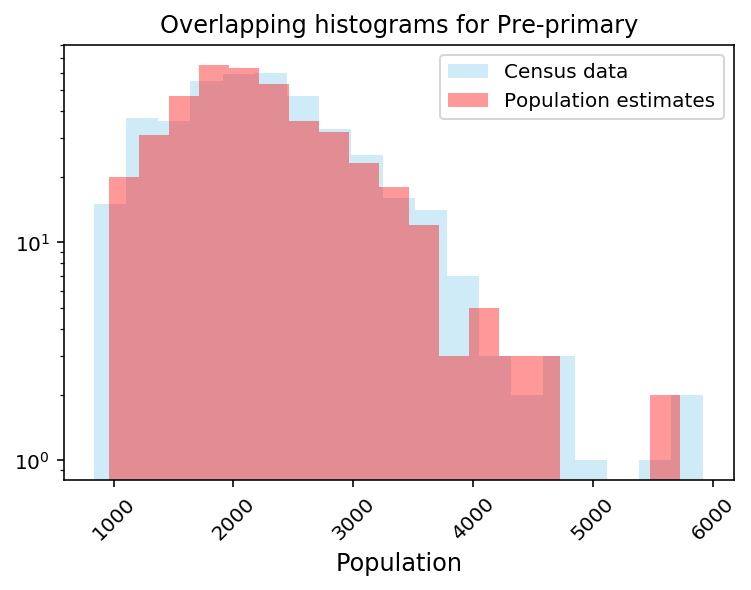

Primary


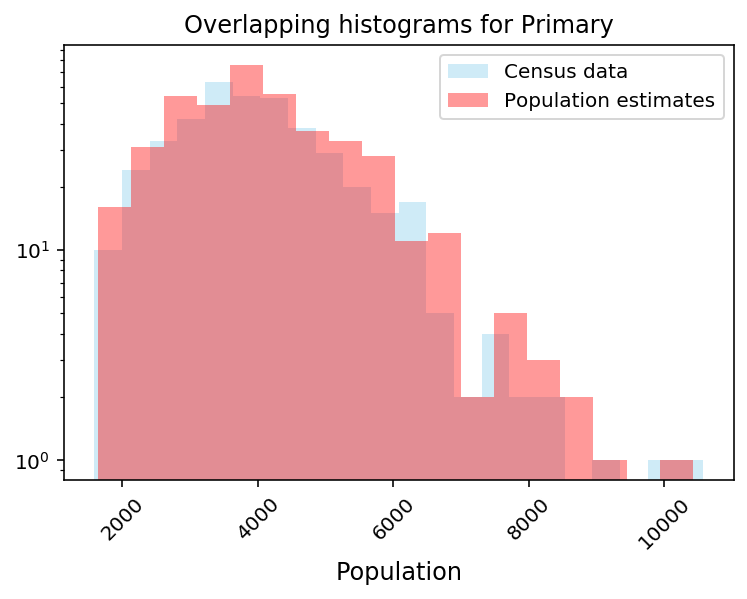

Lower secondary


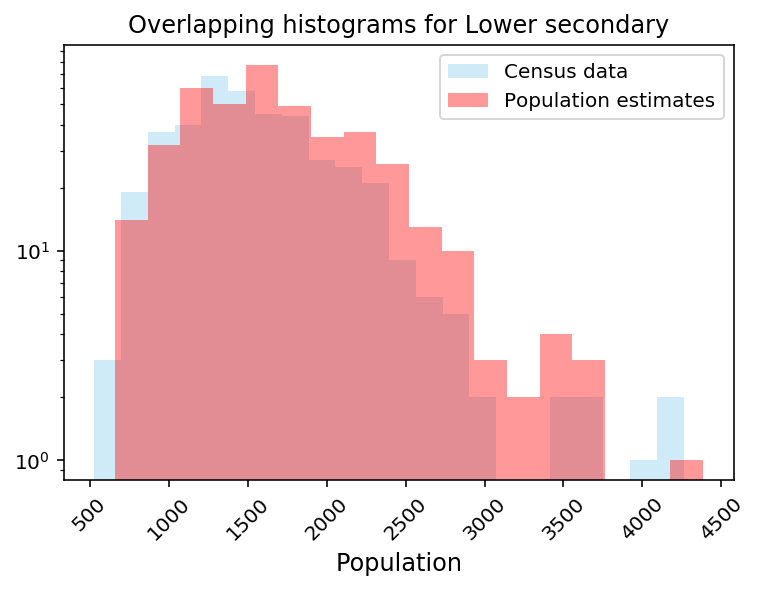

Upper secondary


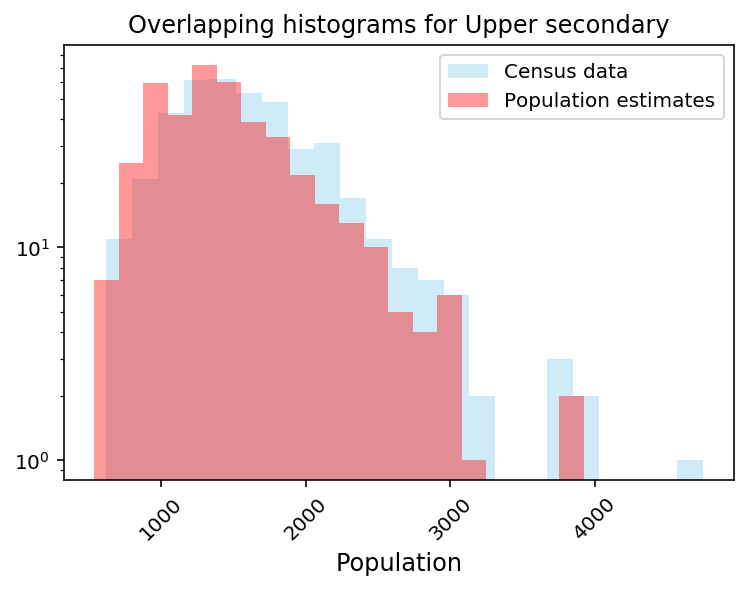

In [11]:
bars = ['Pre-primary', 'Primary', 'Lower secondary', 'Upper secondary']
for x in range(len(Levels)):
    print(bars[x])
    sns.distplot( MergedData["CD_"+Levels[x]] , color="skyblue", label="Census data", hist=True, kde=False, rug=False)
    sns.distplot( MergedData["PE_"+Levels[x]] , color="red", label="Population estimates", hist=True, kde=False, rug=False)
    plt.xlabel('Population', color = 'black', fontsize='12')
    plt.title("Overlapping histograms for " + bars[x])
    plt.legend()
    plt.xticks(color='black', rotation=45)
    plt.yscale('log')
    plt.show()

Pre-primary


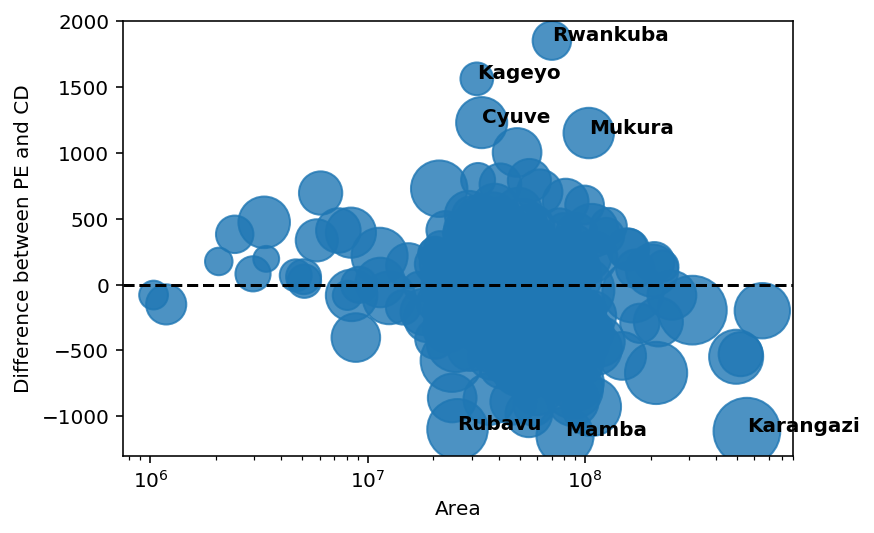

Primary


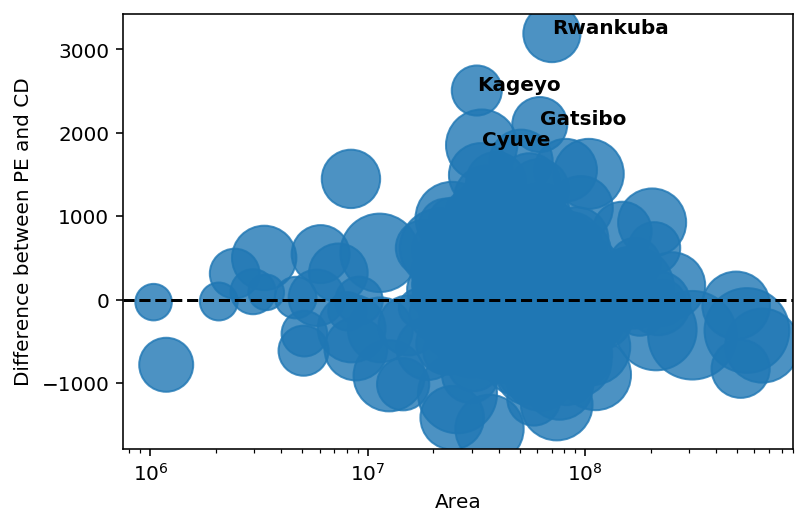

Lower secondary


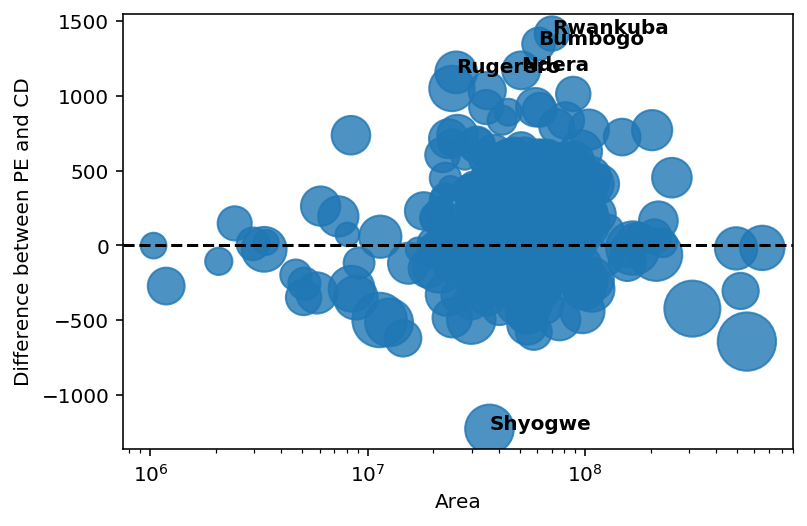

Upper secondary


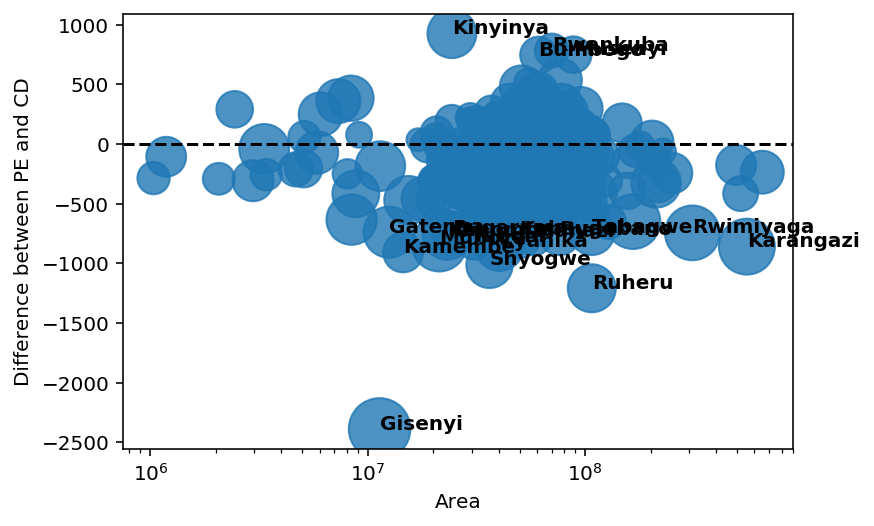

In [12]:
for x in range(len(Levels)):
    MergedData['Label_'+Levels[x]] = np.where(MergedData['Dif_'+Levels[x]]>=MergedData['Dif_'+Levels[x]].mean()+3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM3_EN'],
                                              np.where(MergedData['Dif_'+Levels[x]]<=-MergedData['Dif_'+Levels[x]].mean()-3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM3_EN'], ''))
    print(bars[x])
    p1 = sns.regplot(x=MergedData['Area'], y=MergedData['Dif_'+Levels[x]], scatter_kws={'s':MergedData['CD_'+Levels[x]]/5}, fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['Area'][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

In [13]:
Results = {}
for x in range(len(Levels)):
    formula = "PE_"+Levels[x]+"_std ~ CD_"+Levels[x]+"_std"
    result = sm.ols(formula=formula, data=MergedData).fit()
    heteroscedasticity_test = diag.het_breuschpagan(result.resid, result.model.exog)
    if heteroscedasticity_test[-1] <= 0.05:
        # The hypothesis that the error variance does not depend on x is rejected. There exists heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit(cov_type='HC0')
        print("Robust regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'Yes'}
    else:
        # The hypothesis that the error variance does not depend on x is kept. There is no heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit()
        print("Regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue[0][0]))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'No'}


Robust regression results for Pre-primary

                            OLS Regression Results                            
Dep. Variable:      PE_PrePrimary_std   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1268.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          4.08e-128
Time:                        15:32:31   Log-Likelihood:                -260.90
No. Observations:                 416   AIC:                             525.8
Df Residuals:                     414   BIC:                             533.9
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [14]:
Results = pd.DataFrame.from_dict(Results)
Results = Results.transpose()
Results['ConfidenceInterval'] = 1.98*Results['Std']
Results['Color'] = np.where(Results['Robust']=='Yes','lightblue','darkolivegreen')
Results = Results.transpose()
Results

,PrePrimary,Primary,LowSec,UppSec
Coefficient,0.891215,0.926403,0.835534,0.865152
Std,0.0250247,0.0177661,0.0281171,0.0460929
t_test,-4.34712,-4.14255,-5.84932,-2.92557
p_value,1.3793542439387307e-05,3.43471386818595e-05,4.935823721883254e-09,0.003438213867732969
R_square,0.794264,0.858223,0.698117,0.748488
Robust,Yes,Yes,Yes,Yes
ConfidenceInterval,0.0495488,0.0351768,0.0556718,0.091264
Color,lightblue,lightblue,lightblue,lightblue


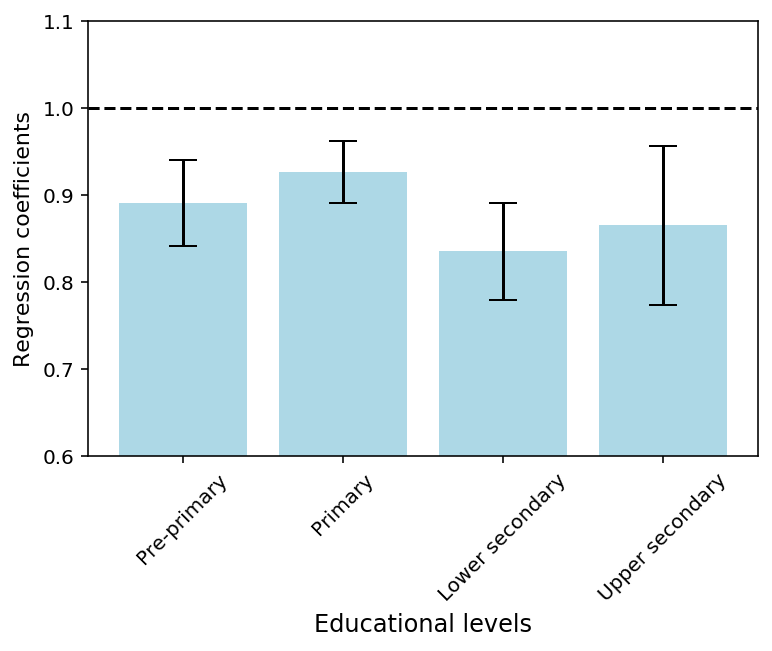

In [15]:
height = list(Results.loc['Coefficient'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
yer1 = list(Results.loc['ConfidenceInterval'])
plt.bar(y_pos, height, yerr=yer1, capsize=7, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('Regression coefficients', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.6,1.1)
plt.show()

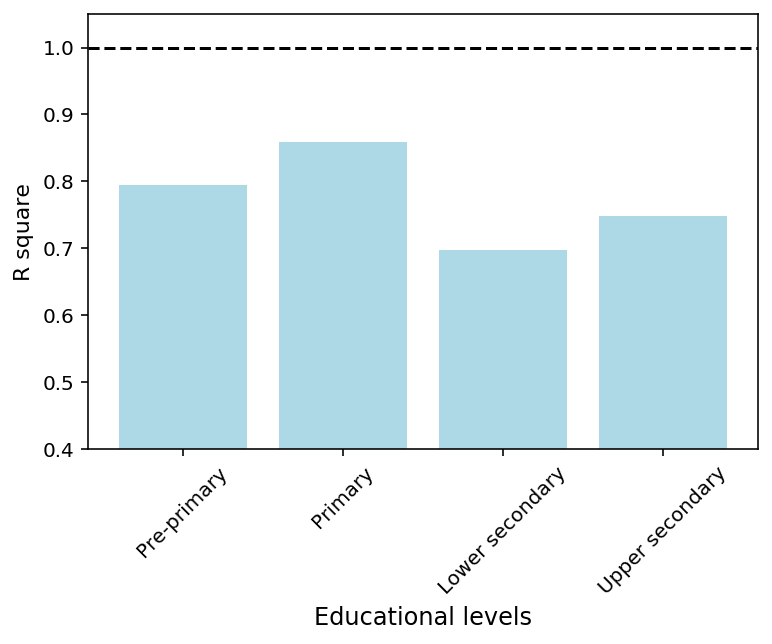

In [16]:
height = list(Results.loc['R_square'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('R square', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.4,1.05)
plt.show()

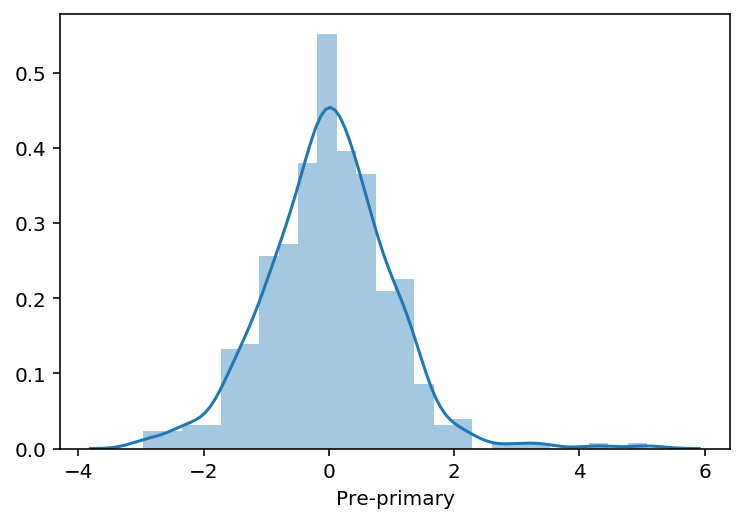

The difference between the Population estimates and the
Census data is not normally distributed for Pre-primary


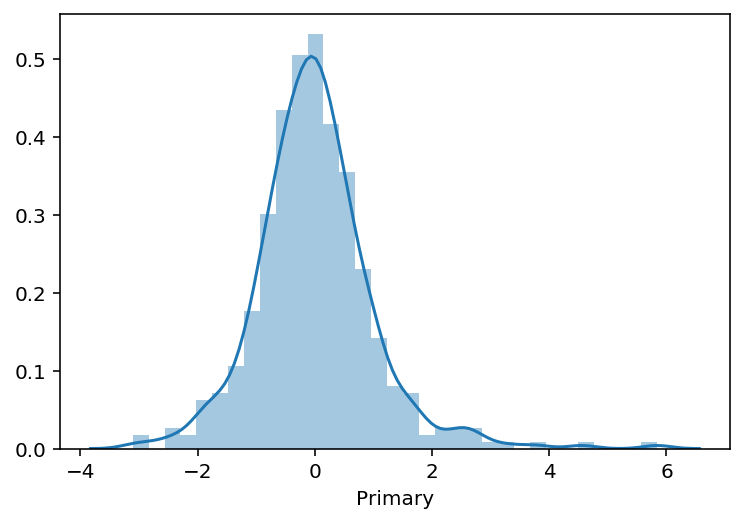

The difference between the Population estimates and the
Census data is not normally distributed for Primary


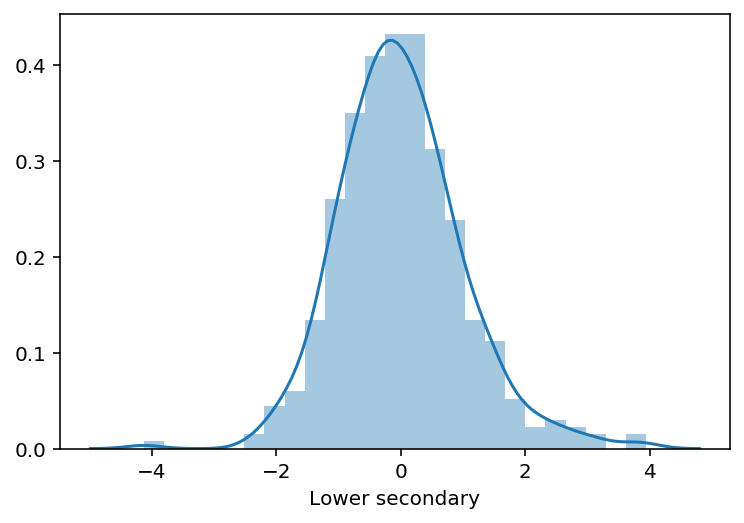

The difference between the Population estimates and the
Census data is not normally distributed for Lower secondary


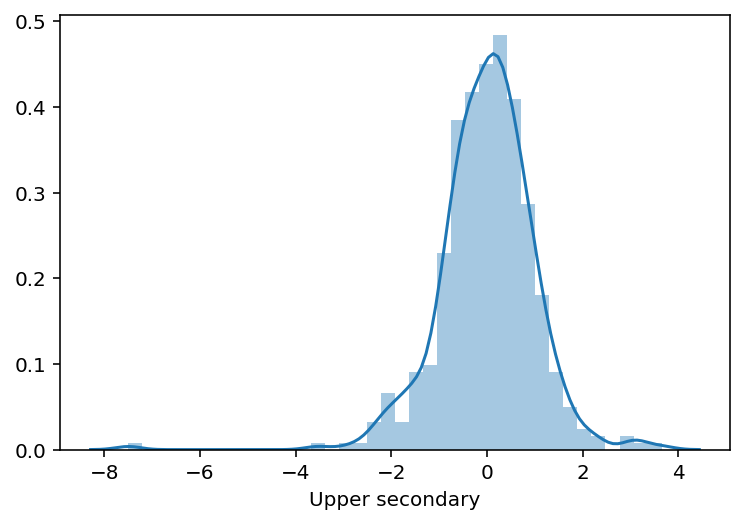

The difference between the Population estimates and the
Census data is not normally distributed for Upper secondary


In [17]:
for x in range(len(Levels)):
    sns.distplot( MergedData["Dif_"+Levels[x]+"_std"])
    plt.xlabel(bars[x])
    plt.show()
    jbt = jarque_bera(MergedData["Dif_"+Levels[x]+"_std"])
    if jbt[1]>0.05:
        print("The difference between the Population estimates and the")
        print("Census data is normally distributed for "+bars[x])
    else:
        print("The difference between the Population estimates and the")
        print("Census data is not normally distributed for "+bars[x])

Pre-primary


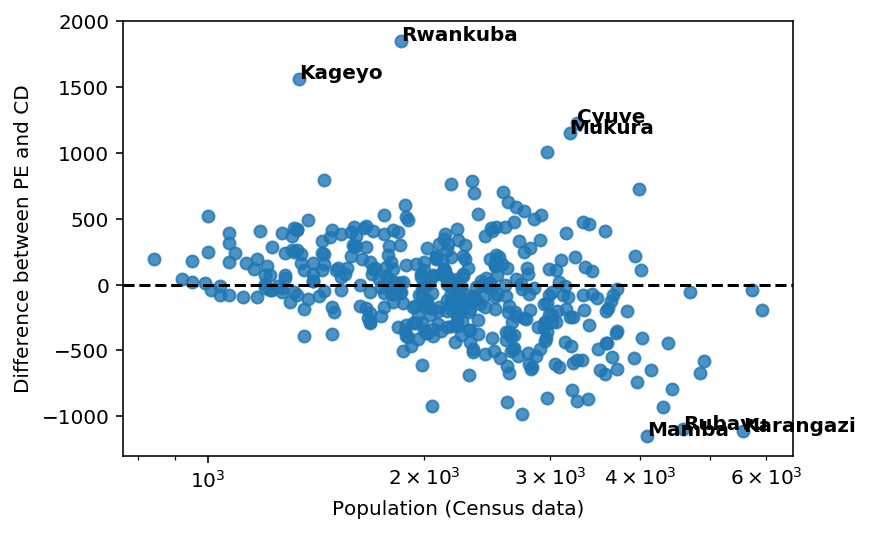

Primary


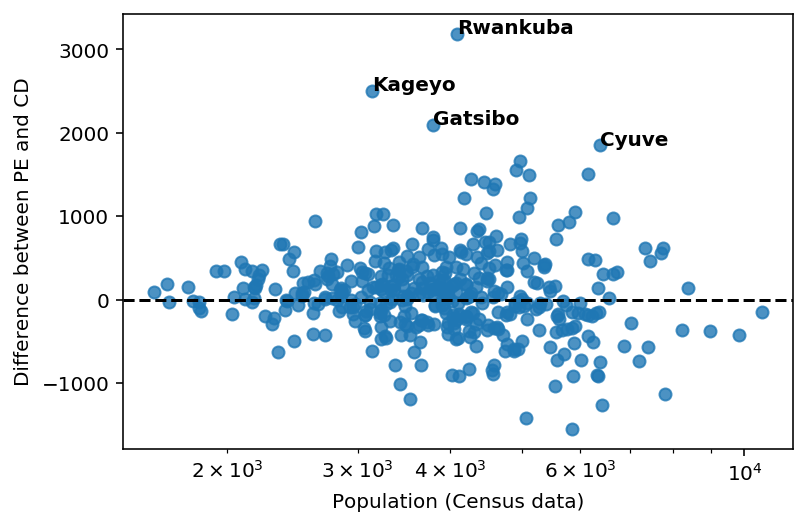

Lower secondary


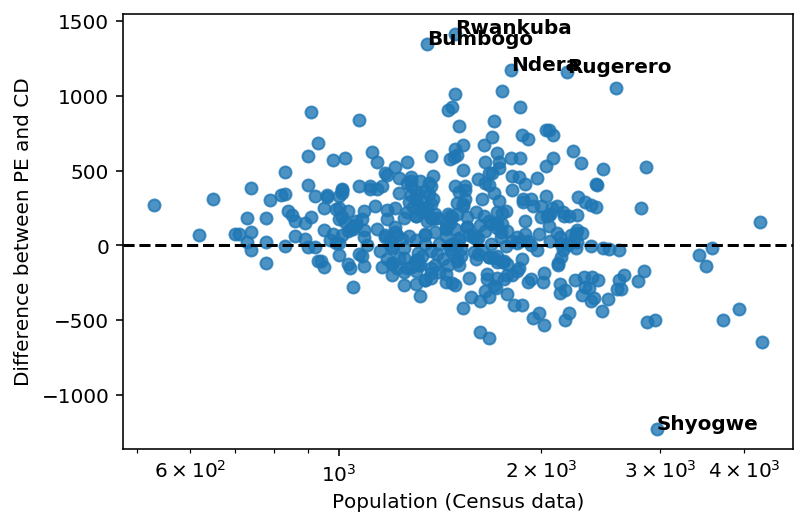

Upper secondary


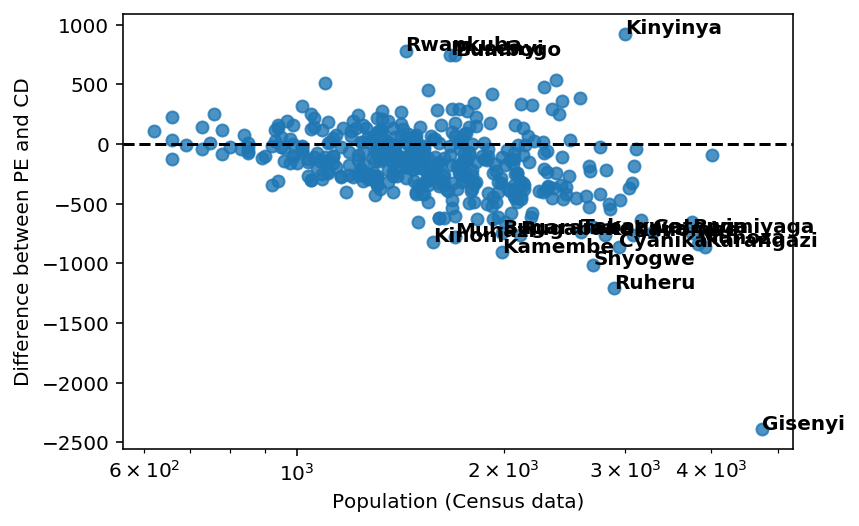

In [18]:
for x in range(len(Levels)):
    print(bars[x])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Dif_'+Levels[x]], fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

Pre-primary


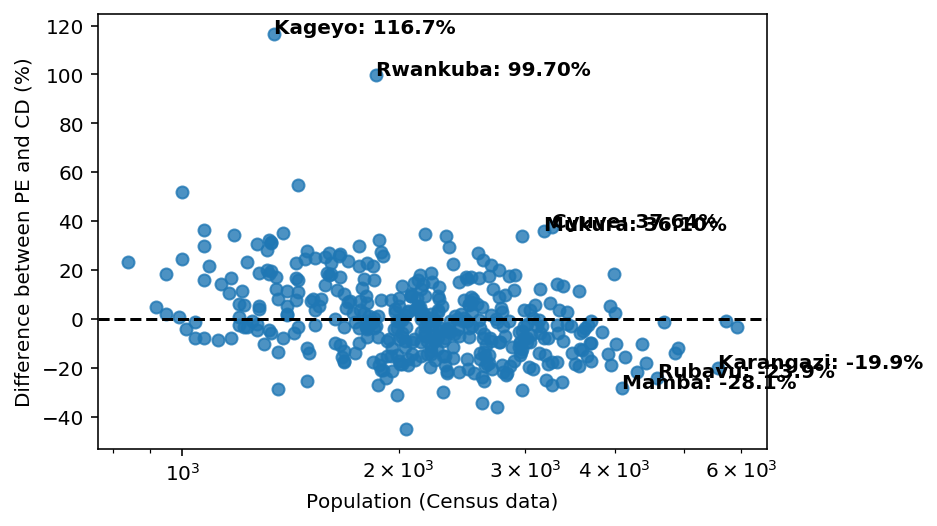

Primary


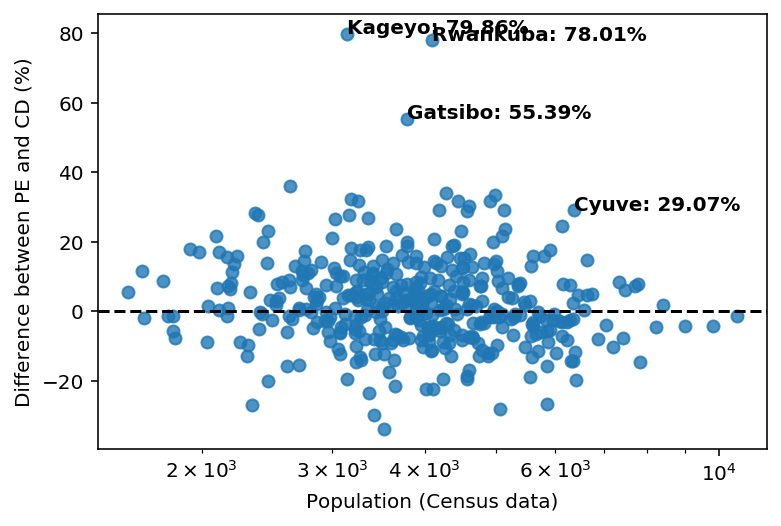

Lower secondary


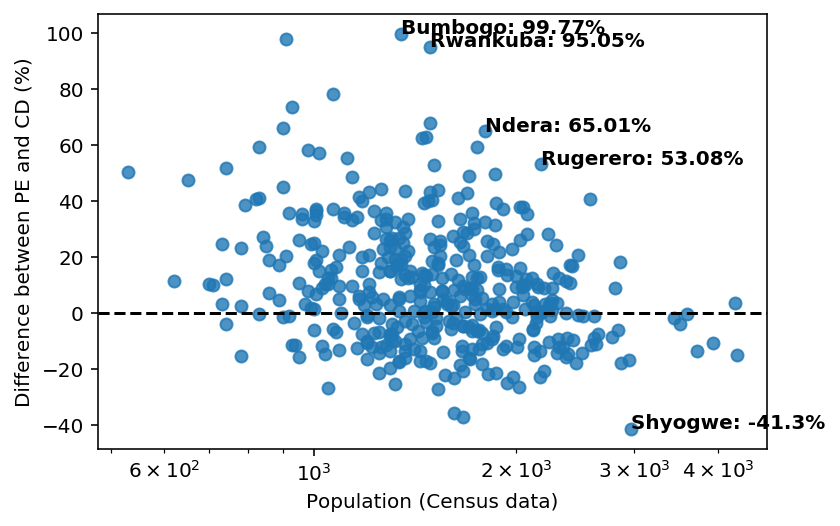

Upper secondary


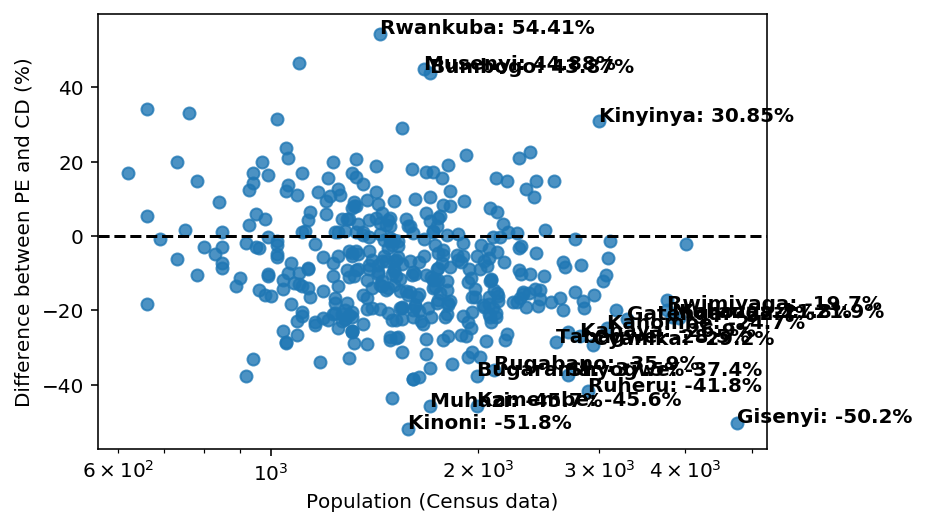

In [19]:
for x in range(len(Levels)):
    print(bars[x])
    MergedData['Perc_Dif_'+Levels[x]] = MergedData['Dif_'+Levels[x]]/MergedData['CD_'+Levels[x]]*100
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Perc_Dif_'+Levels[x]], fit_reg=False)
    for line in range(0,MergedData.shape[0]):
        if MergedData['Label_'+Levels[x]][line]!='':
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line]+': '+str(MergedData['Perc_Dif_'+Levels[x]][line])[:5]+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
        else:
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD (%)')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()